# Memprediksi Hasil Pertandingan CS:GO

`Faisal Kengo (FTDS Remote Batch 014)`

## Perkenalan

Nama saya Faisal Kengo, kali ini saya akan melatih berbagai macam model klasifikasi untuk memprediksi hasil pertandingan Counter-Strike: Global Offensive (CS:GO) tingkat profesional. *Dataset* yang digunakan diambil dari [Kaggle.com](https://www.kaggle.com/datasets/gabrieltardochi/counter-strike-global-offensive-matches) yang terdiri dari berbagai macam data yang muncul pada saat pertandingan CS:GO dilaksanakan mulai dari nama tim yang bertanding, kapan pertandingan berlangsung, berapa skor dari pertandingan tersebut, serta berbagai statistik yang menggambarkan performa pemain dari kedua tim yang bertanding sesuai dengan yang data yang terdapat di dalam portal [hltv.org](https://www.hltv.org/) dari tahun 2016 sampai tahun 2020.

### Tujuan Utama

Tujuan dari penyusunan laporan ini adalah sebagai berikut:

* Memprediksi hasil pertandingan CS:GO tingkat profesional dengan berbagai macam algoritma klasifikasi, baik dengan algoritma dengan *default hyperparameter* maupun algoritma yang sudah dilakukan *tuning* pada *hyperparameter*-nya,

* Menampilkan hasil dari prediksi ke dalam sebuah *dashboard*.

## Pengolahan dan Analisa *Dataset*

Sebelum kita memulai proses analisa data, kita akan mengimpor *library* yang akan digunakan untuk mengolah *dataset* serta memuat *dataset* yang telah kita unduh dari sumber.

### Impor *Library*

Pertama-tama kita akan mengimpor terlebih dahulu *library* yang akan kita gunakan.

In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

Setelah kita memuat *library* yang akan kita gunakan, kita akan muat *dataset* yang sudah kita unduh.

### Memuat *Dataset*

In [182]:
df = pd.read_csv("csgo_games.csv")

Lalu kita akan tampilkan bagian awal dari *dataset* tersebut.

In [183]:
df.head()

,match_date,team_1,team_2,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,winner,...,t2_player5_dpr,t2_player5_spr,t2_player5_opk_ratio,t2_player5_opk_rating,t2_player5_wins_perc_after_fk,t2_player5_fk_perc_in_wins,t2_player5_multikill_perc,t2_player5_rating_at_least_one_perc,t2_player5_is_sniper,t2_player5_clutch_win_perc
0,2016-12-18,CLOUD9,HELLRAISERS,13,16,9,20,0.500000,0.500000,t2,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,0.666667
1,2016-12-18,IMMORTALS,G2,17,19,13,10,0.500000,0.500000,t2,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,0.406250
2,2016-12-18,MOUSESPORTS,IMMORTALS,16,3,12,13,0.500000,0.500000,t1,...,0.67,0.07,0.79,0.94,0.723,0.129,0.148257,0.526,False,0.733333
3,2016-12-18,DIGNITAS,G2,16,9,6,10,0.416667,0.583333,t1,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,0.406250
4,2016-12-18,OPTIC,HELLRAISERS,16,10,4,20,0.500000,0.500000,t1,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,0.666667


Tak lupa kita tampilkan bagian akhir dari *dataset* tersebut.

In [184]:
df.tail()

,match_date,team_1,team_2,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,winner,...,t2_player5_dpr,t2_player5_spr,t2_player5_opk_ratio,t2_player5_opk_rating,t2_player5_wins_perc_after_fk,t2_player5_fk_perc_in_wins,t2_player5_multikill_perc,t2_player5_rating_at_least_one_perc,t2_player5_is_sniper,t2_player5_clutch_win_perc
3782,2020-01-25,VIRTUS.PRO,CLOUD9,0,2,19,17,0.500000,0.500000,t2,...,0.67,0.11,0.80,0.95,0.681,0.121,0.130481,0.444,False,0.777778
3783,2020-01-24,HEROIC,MAD LIONS,10,16,16,18,0.333333,0.666667,t2,...,0.65,0.08,0.64,0.80,0.811,0.082,0.095975,0.250,False,0.625000
3784,2020-01-19,HEROIC,FORZE,0,2,16,13,0.857143,0.142857,t2,...,0.63,0.09,0.89,0.92,0.747,0.113,0.154618,0.635,False,0.709677
3785,2020-01-19,CR4ZY,FORZE,0,2,20,13,0.538462,0.461538,t2,...,0.63,0.09,0.89,0.92,0.747,0.113,0.154618,0.635,False,0.709677
3786,2020-01-10,CLOUD9,MIBR,3,1,18,14,0.400000,0.600000,t1,...,0.65,0.06,1.06,0.99,0.702,0.133,0.145880,0.552,False,0.483871


### *Exploratory Data Analysis*

Pertama-tama kita akan melihat terlebih dahulu bagaimana data-data yang kita miliki di dalam *dataset* yang sudah dimuat dengan perintah `.info()`:

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3787 entries, 0 to 3786
Columns: 170 entries, match_date to t2_player5_clutch_win_perc
dtypes: bool(10), float64(152), int64(4), object(4)
memory usage: 4.7+ MB


Dari perintah di atas, kita dapat mengetahui bahwa *dataset* yang akan kita gunakan mengandung 3787 data yang tersusun dari 170 kolom yang berbeda. Namun pada perintah ini kita tidak dapat melihat *dataset* ini membahas tentang apa saja. Untuk menampilkan keseluruhan informasi dari setiap kolom di dalam *dataset*, kita akan tambahkan argumen `verbose = True, show_counts = True` ke dalam perintah `.info()`.

In [186]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3787 entries, 0 to 3786
Data columns (total 170 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    match_date                           3787 non-null   object 
 1    team_1                               3787 non-null   object 
 2    team_2                               3787 non-null   object 
 3    t1_points                            3787 non-null   int64  
 4    t2_points                            3787 non-null   int64  
 5    t1_world_rank                        3787 non-null   int64  
 6    t2_world_rank                        3787 non-null   int64  
 7    t1_h2h_win_perc                      3787 non-null   float64
 8    t2_h2h_win_perc                      3787 non-null   float64
 9    winner                               3787 non-null   object 
 10   t1_player1_rating                    3787 non-null   float64
 11   t1_player1_impa

Kemudian kita akan mencari tahu rentang waktu pengambilan data. dengan perintah berikut:

In [187]:
print("Pertandingan pertama yang tercatat:", df.match_date.min())
print("Pertandingan terakhir yang tercatat:",df.match_date.max())

Pertandingan pertama yang tercatat: 2016-01-14
Pertandingan terakhir yang tercatat: 2020-12-20


Untuk mengetahui secara persis rentang waktu pengambilan data, kita akan ubah terlebih dahulu tipe data pada `match_date` dari 'object' ke 'date'.

In [188]:
df["match_date"] =  pd.to_datetime(df["match_date"])

Kemudian kita akan susun ulang data berdasarkan tanggal pertandingannya dan akan kita *reset* indeks *dataset*-nya.

In [189]:
df.sort_values(by = "match_date", inplace = True)
df.reset_index(drop = True, inplace = True)

print("Pertandingan pertama yang tercatat:", df.match_date.min())
print("Pertandingan terakhir yang tercatat:",df.match_date.max())

Pertandingan pertama yang tercatat: 2016-01-14 00:00:00
Pertandingan terakhir yang tercatat: 2020-12-20 00:00:00




Selanjutnya kita akan periksa ada berapa tim yang tercatat bertanding di dalam kompetisi CSGO profesional: 

In [190]:
column_teams = df[["team_1", "team_2"]].values.ravel()
unique_teams =  pd.unique(column_teams)
unique_teams_df = pd.DataFrame(unique_teams, columns = ["Team"])

unique_teams_df.nunique()

Team    69
dtype: int64

Dari perintah di atas, kita dapat mengetahui bahwa terdapat 69 tim yang bertanding dan tercatat di dalam *dataset*. Perlu diingat bahwa ada kemungkinan satu tim mungkin hanya tercatat bertanding satu kali saja dan ada kemungkinan bahwa suatu tim berhenti beroperasi pada titik tertentu di tengah-tengah rentang waktu pencatatan data.

Selanjutnya kita akan lihat berapa banyak poin yang diraih oleh kedua tim dalam suatu pertandingan.

In [191]:
print("Poin yang diperoleh tim di sisi kiri: ", df.t1_points.unique())
print("Poin yang diperoleh tim di sisi kiri: ", df.t2_points.unique())

Poin yang diperoleh tim di sisi kiri:  [ 2  0  1 16  9 19  3 12  5  7  4 13 14 20 11 15  6 10  8 22 28 17 34 25
 21 18 24 31 32 23 26]
Poin yang diperoleh tim di sisi kiri:  [ 0  2  1  9 16  3 22 13 14  6 10  8 12  7  5 17 11 19  4 31 18 28 15 24
 23 25 20 34 21]


Dari perintah di atas dapat diketahui bahwa ada pertandingan dalam *format Best of 1* yang tercatat di dalam *dataset*. Hal ini dibuktikan dengan besarnya skor pertandingan yang bisa melebihi angka 3.

Untuk membuktikan hal ini, kita akan membuat sebuah *query* untuk melihat berapa jumlah pertandingan yang dimainkan dalam format *best of 1*.

In [192]:
df_bo1 = df.query("t1_points > 3 or t2_points > 3")
df_bo1

,match_date,team_1,team_2,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,winner,...,t2_player5_dpr,t2_player5_spr,t2_player5_opk_ratio,t2_player5_opk_rating,t2_player5_wins_perc_after_fk,t2_player5_fk_perc_in_wins,t2_player5_multikill_perc,t2_player5_rating_at_least_one_perc,t2_player5_is_sniper,t2_player5_clutch_win_perc
7,2016-01-22,ASTRALIS,DIGNITAS,16,9,4,14,0.666667,0.333333,t1,...,0.75,0.09,0.82,1.05,0.779,0.189,0.165812,0.277,False,0.615385
8,2016-01-22,LUMINOSITY,FAZE,9,16,6,8,1.000000,0.000000,t2,...,0.66,0.07,0.97,0.96,0.739,0.131,0.143668,0.415,False,0.709677
10,2016-01-22,NATUS VINCERE,SK,16,3,2,19,1.000000,0.000000,t1,...,0.68,0.08,0.86,0.98,0.756,0.150,0.167409,0.475,False,0.666667
11,2016-01-22,NATUS VINCERE,FAZE,16,9,2,8,0.461538,0.538462,t1,...,0.66,0.07,0.97,0.96,0.739,0.131,0.143668,0.415,False,0.709677
12,2016-01-22,MOUSESPORTS,ASTRALIS,19,22,12,4,0.333333,0.666667,t2,...,0.68,0.07,0.95,1.01,0.726,0.141,0.160968,0.438,True,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,2020-06-03,EVIL GENIUSES,CLOUD9,16,14,9,16,0.333333,0.666667,t1,...,0.68,0.10,0.62,0.86,0.704,0.114,0.123109,0.391,False,0.687500
3488,2020-06-03,ASTRALIS,VITALITY,6,16,2,10,0.750000,0.250000,t2,...,0.69,0.08,0.75,0.91,0.832,0.141,0.144863,0.560,False,0.363636
3489,2020-06-03,FNATIC,MOUSESPORTS,16,14,3,5,0.437500,0.562500,t1,...,0.75,0.06,0.63,0.91,0.688,0.149,0.124622,0.297,False,0.384615
3490,2020-06-04,MOUSESPORTS,MAD LIONS,15,15,5,15,0.666667,0.333333,draw,...,0.61,0.09,0.84,0.87,0.765,0.090,0.143275,0.579,False,0.571429


Dari hasil *query*, kita mendapati bahwa terdapat 2063 pertandingan yang dimainkan dalam *format best of 1*. Jumlah pertandingan dalam *format best of 1* memiliki jumlah lebih banyak dibanding pertandingan dengan *format best of 3* atau *best of 5* karena *format best of 1* umumnya dilakukan pada tahap kualifikasi awal dari setiap turnamen.

Selanjutnya kita akan lihat bagaimana distribusi peringkat dunia dari tim-tim yang bertanding di dalam turnamen.

In [193]:
column_rank = df[["t1_world_rank", "t2_world_rank"]].values.ravel()
unique_rank =  pd.unique(column_rank)
unique_rank_df = pd.DataFrame(unique_rank, columns = ["Team"])

unique_rank_df.Team.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64)

Dari data di atas, kita dapat melihat bahwa tim-tim yang bertanding di dalam turnamen berada pada rentang peringkat 1 sampai 22 dunia. Perlu diperhatikan bahwa peringkat tim dapat berubah tergantung dari pencapaian tim tersebut di turnamen terakhir.

Selanjutnya kita akan melihat bagaimana distribusi performa tiap-tiap pemain di sisi kiri di setiap pertandingan.

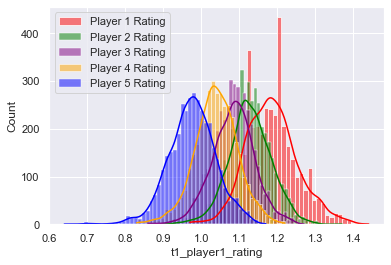

In [194]:
sns.set(style="darkgrid")

sns.histplot(data = df, x = "t1_player1_rating", color = "red", label = "Player 1 Rating", kde = True)
sns.histplot(data = df, x = "t1_player2_rating", color = "green", label = "Player 2 Rating", kde = True)
sns.histplot(data = df, x = "t1_player3_rating", color = "purple", label = "Player 3 Rating", kde = True)
sns.histplot(data = df, x = "t1_player4_rating", color = "orange", label = "Player 4 Rating", kde = True)
sns.histplot(data = df, x = "t1_player5_rating", color = "blue", label = "Player 5 Rating", kde = True)

plt.legend() 
plt.show()

Dari grafik di atas, kita dapat lihat bahwa *player 1* merupakan pemain dengan *rating* terbesar di dalam suatu pertandingan dengan rata-rata *rating* sebesar 1.2. Selain itu kita dapat melihat rata-rata dari *player 2*, *player 3*, *player 4*, dan *player 5* masing-masing sebesar 1.15, 1.1, 1.05, dan 1.

Selanjutnya kita akan bandingkan grafik tersebut dengan persebaran *rating* dari tim di sisi kanan.

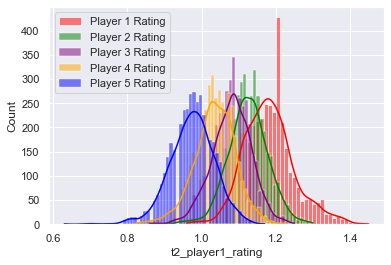

In [195]:
sns.set(style="darkgrid")

sns.histplot(data = df, x = "t2_player1_rating", color = "red", label = "Player 1 Rating", kde = True)
sns.histplot(data = df, x = "t2_player2_rating", color = "green", label = "Player 2 Rating", kde = True)
sns.histplot(data = df, x = "t2_player3_rating", color = "purple", label = "Player 3 Rating", kde = True)
sns.histplot(data = df, x = "t2_player4_rating", color = "orange", label = "Player 4 Rating", kde = True)
sns.histplot(data = df, x = "t2_player5_rating", color = "blue", label = "Player 5 Rating", kde = True)

plt.legend() 
plt.show()

Dari grafik di atas, kita dapat lihat bahwa *player 1* merupakan pemain dengan *rating* terbesar di dalam suatu pertandingan dengan rata-rata *rating* sebesar 1.2. Selaimn itu kita dapat lihat bahwa rata-rata *rating* untuk pemain kedua, ketiga, keempat, dan kelima kurang-lebih sama seperti pada *rating* pemain di sisi kiri.

Lalu kita akan lihat indeks pengaruh kelima pemain dari masing-masing tim pada pertandingan.

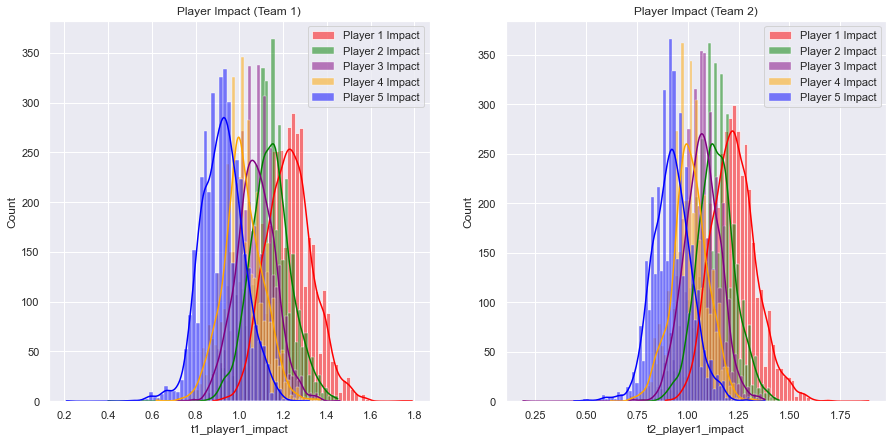

In [196]:
plt.figure(figsize = (15, 7))

plt.subplot(1, 2, 1)
plt.title("Player Impact (Team 1)")
sns.set(style="darkgrid")

sns.histplot(data = df, x = "t1_player1_impact", color = "red", label = "Player 1 Impact", kde = True)
sns.histplot(data = df, x = "t1_player2_impact", color = "green", label = "Player 2 Impact", kde = True)
sns.histplot(data = df, x = "t1_player3_impact", color = "purple", label = "Player 3 Impact", kde = True)
sns.histplot(data = df, x = "t1_player4_impact", color = "orange", label = "Player 4 Impact", kde = True)
sns.histplot(data = df, x = "t1_player5_impact", color = "blue", label = "Player 5 Impact", kde = True)

plt.legend() 

plt.subplot(1, 2, 2)
plt.title("Player Impact (Team 2)")
sns.set(style="darkgrid")

sns.histplot(data = df, x = "t2_player1_impact", color = "red", label = "Player 1 Impact", kde = True)
sns.histplot(data = df, x = "t2_player2_impact", color = "green", label = "Player 2 Impact", kde = True)
sns.histplot(data = df, x = "t2_player3_impact", color = "purple", label = "Player 3 Impact", kde = True)
sns.histplot(data = df, x = "t2_player4_impact", color = "orange", label = "Player 4 Impact", kde = True)
sns.histplot(data = df, x = "t2_player5_impact", color = "blue", label = "Player 5 Impact", kde = True)

plt.legend()
plt.show()

Dapat kita lihat dari kedua gradik di atas kalau pemain pertama sampai kelima dari dua belah pihak masing-masing memiliki nilai indeks pengaruh yang kurang-lebih sama pada saat pertandingan berlangsung.

Selain itu kita akan lihat persentase kemenangan *head-to-head* dari setiap pertandingan.

In [197]:
df.t1_h2h_win_perc.describe()

count    3787.000000
mean        0.517780
std         0.228813
min         0.000000
25%         0.389566
50%         0.500000
75%         0.666667
max         1.000000
Name: t1_h2h_win_perc, dtype: float64

In [198]:
df.t2_h2h_win_perc.describe()

count    3787.000000
mean        0.482220
std         0.228813
min         0.000000
25%         0.333333
50%         0.500000
75%         0.610434
max         1.000000
Name: t2_h2h_win_perc, dtype: float64

Dari kedua perintah di atas kita dapat mengetahui bahwa nilai rata-rata rasio kemenangan dari kedua tim adalah 52% dan 48%. Perhatikan bahwa nilai-nilai rata-rata, minimal, kuartil 1-2-3, dan maksimal dari rasio kemenangan *head-to-head* di tim kiri berkorespondensi dengan nilai rata-rata, maksimal, kuartil 3-2-1, dan minimal dari rasio kemenangan *head-to-head* di tim kanan sehingga menghasilkan nilai 100%.

Selanjutnya kita akan melihat bagaimana hasil dari keseluruhan pertandingan.

In [199]:
df.winner.value_counts().sort_index()

draw      24
t1      1921
t2      1842
Name: winner, dtype: int64

Kemudian untuk memudahkan visualisasi, kita akan buat grafik batangnya.

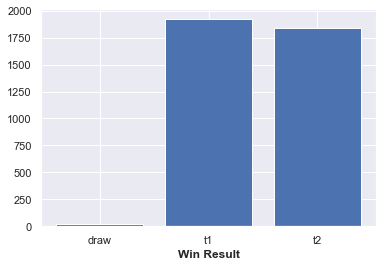

In [200]:
height = df.winner.value_counts().sort_index()

bars = (df.winner.value_counts().sort_index().index[()])
x_pos = np.arange(len(bars))

plt.bar(x_pos, height)
plt.xticks(x_pos, bars)
plt.xlabel("Win Result", fontweight = "bold")

plt.show()

Dari grafik di atas, kita dapat lihat bahwa data yang kita miliki memiliki keseimbangan antara data kemenangan di tim bagian kiri dan kemenangan di tim bagian kanan.

In [201]:
df_draw = df.query("winner == 'draw'")
df_draw

,match_date,team_1,team_2,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,winner,...,t2_player5_dpr,t2_player5_spr,t2_player5_opk_ratio,t2_player5_opk_rating,t2_player5_wins_perc_after_fk,t2_player5_fk_perc_in_wins,t2_player5_multikill_perc,t2_player5_rating_at_least_one_perc,t2_player5_is_sniper,t2_player5_clutch_win_perc
58,2016-02-17,FLIPSID3,E-FRAG.NET,1,1,14,17,0.750000,0.250000,draw,...,0.68,0.05,0.84,0.91,0.720,0.111,0.140000,0.370,False,0.608696
76,2016-02-23,E-FRAG.NET,SK,1,1,17,16,1.000000,0.000000,draw,...,0.69,0.08,1.01,1.07,0.772,0.174,0.169511,0.561,False,0.529412
530,2016-09-13,GAMBIT,FLIPSID3,1,1,17,15,0.500000,0.500000,draw,...,0.75,0.08,0.81,0.92,0.790,0.155,0.124044,0.333,False,0.400000
560,2016-09-20,GODSENT,HEROIC,1,1,8,11,1.000000,0.000000,draw,...,0.68,0.09,0.98,0.95,0.775,0.123,0.155137,0.550,False,0.620690
927,2017-01-13,VIRTUS.PRO,ENVY,1,1,6,11,0.410256,0.589744,draw,...,0.62,0.11,1.34,1.00,0.735,0.122,0.141812,0.535,False,0.782609
1045,2017-03-08,KINGUIN,GAMBIT,1,1,16,8,0.421053,0.578947,draw,...,0.69,0.10,0.91,0.95,0.787,0.129,0.173529,0.560,False,1.000000
1500,2017-08-29,HEROIC,SPACE SOLDIERS,1,1,16,19,0.500000,0.500000,draw,...,0.64,0.08,0.86,0.95,0.697,0.120,0.144214,0.556,False,0.461538
1527,2017-09-05,NORTH,GAMBIT,1,1,4,5,0.888889,0.111111,draw,...,0.68,0.08,0.82,0.89,0.737,0.108,0.146230,0.429,False,0.631579
1878,2017-11-24,ENVY,VIRTUS.PRO,15,15,14,8,0.625000,0.375000,draw,...,0.67,0.09,0.90,0.90,0.733,0.113,0.131818,0.442,False,0.645161
1887,2017-11-25,ASTRALIS,NORTH,15,15,3,7,0.571429,0.428571,draw,...,0.72,0.09,0.97,1.08,0.746,0.180,0.157596,0.537,False,0.600000


## *Data Preprocessing*

### Mengambil dan Memisahkan *Data Inference*

Sebelum kita membagi *dataset train* dan *dataset test*, kita pisahkan dulu beberapa buah data untuk kita lakukan *inferencing* nantinya.

In [202]:
df_inf = df.sample(10, random_state = 2)
df_inf

,match_date,team_1,team_2,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,winner,...,t2_player5_dpr,t2_player5_spr,t2_player5_opk_ratio,t2_player5_opk_rating,t2_player5_wins_perc_after_fk,t2_player5_fk_perc_in_wins,t2_player5_multikill_perc,t2_player5_rating_at_least_one_perc,t2_player5_is_sniper,t2_player5_clutch_win_perc
2864,2019-03-22,BIG,WINDIGO,0,2,18,16,0.750000,0.250000,t2,...,0.66,0.09,0.90,0.93,0.736,0.114,0.146577,0.478,False,0.555556
1872,2017-11-23,FAZE,VIRTUS.PRO,16,8,1,8,0.750000,0.250000,t1,...,0.67,0.09,0.90,0.90,0.736,0.112,0.130636,0.441,False,0.645161
279,2016-05-04,FNATIC,NIP,0,2,3,5,0.644068,0.355932,t2,...,0.66,0.10,0.89,0.95,0.752,0.125,0.157729,0.583,False,0.631579
3709,2020-10-31,VITALITY,BIG,2,1,3,6,0.714286,0.285714,t1,...,0.68,0.07,0.79,0.90,0.675,0.107,0.141484,0.478,False,0.666667
1864,2017-11-21,VIRTUS.PRO,FNATIC,14,16,8,13,0.329412,0.670588,t2,...,0.69,0.09,0.74,0.88,0.763,0.111,0.128800,0.478,False,0.600000
91,2016-02-27,DIGNITAS,CLOUD9,13,16,7,12,0.500000,0.500000,t2,...,0.70,0.10,0.80,0.90,0.754,0.120,0.140073,0.375,False,0.500000
3018,2019-06-09,FURIA,VITALITY,0,2,11,4,1.000000,0.000000,t2,...,0.62,0.12,0.93,0.90,0.811,0.102,0.140677,0.538,False,0.641026
3071,2019-07-13,NRG,RENEGADES,16,8,5,16,0.722222,0.277778,t1,...,0.68,0.08,0.90,0.99,0.731,0.162,0.138000,0.316,True,0.750000
848,2016-11-23,VIRTUS.PRO,ENVY,16,14,3,11,0.394737,0.605263,t1,...,0.65,0.11,0.96,0.91,0.627,0.088,0.135630,0.358,False,0.750000
3760,2020-12-08,VITALITY,MOUSESPORTS,2,0,1,8,0.666667,0.333333,t1,...,0.73,0.05,0.83,1.03,0.716,0.170,0.148915,0.431,True,0.600000


Kemudian kita pisahkan sampel data tadi dari *dataset* aslinya.

In [203]:
df_traintest = df.drop(df_inf.index)
df_traintest.reset_index(drop = True, inplace = True)
df_inf.reset_index(drop = True, inplace = True)
df_traintest.shape

(3777, 170)

### Menghilangkan Hasil Pertandingan yang Belum Selesai

Pada saat kita melakukan pemeriksaan hasil pertandingan, kita mendapati bahwa terdapat hasil pertandingan yang berakhir seri. Karena pertandingan yang berakhir seri ini jumlahnya tidak signifikan dibanding jumlah keseluruhan data yang kita miliki, kita akan hilangkan keseluruhan pertandingan yang berakhir seri.

In [204]:
df_traintest.shape

(3777, 170)

In [205]:
df_traintest = df_traintest.query("winner != 'draw'")
df_traintest.shape

(3753, 170)

### Memisahkan *Data Train* dan *Data Test*

Setelah kita memisahkan *dataset inference* dengan *dataset* aslinya, kita pisahkan lebih lanjut *dataset* yang sudah dipisahkan menjadi tabel fitur dan tabel target. Pada kasus ini target yang dipilih adalah kolom `winner`.

In [206]:
x = df_traintest.drop("winner", axis = 1)
y = df_traintest["winner"]

Kemudian dengan bantuan *library* `sklearn.model_selection.train_test_split`, kita akan memisahkan tabel fitur dan target menjadi *dataset train* dan *dataset test*.

In [207]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

x_train.reset_index(drop = True, inplace = True)
x_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

print("Train Size:", x_train.shape)
print("Test Size:", x_test.shape)

Train Size: (3002, 169)
Test Size: (751, 169)


### Mengurus *Missing Value*

Dari perintah `.info()` sebelumnya kita mengetahui bahwa terdapat 1 buah *missing value* pada kolom `t2_player5_wins_perc_after_fk`. Karena kita sudah membagi *dataset train* dan *dataset test*, kita harus periksa di *dataset* mana *missing value* ini berada.

Pertama-tama kita akan periksa apakah terdapat *missing value* di dalam *dataset train*.

In [208]:
x_train.t2_player5_wins_perc_after_fk.isnull().sum()

0

Ternyata tidak ada *missing value* di *dataset train*. Selanjutnya kita akan periksa di *dataset test*.

In [209]:
x_test.t2_player5_wins_perc_after_fk.isnull().sum()

1

Ternyata *missing value* berada di *dataset test*. Kita akan isi *missing value* ini dengan nilai rata-rata dari kolom tersebut.

In [210]:
x_test.t2_player5_wins_perc_after_fk.fillna(x_train.t2_player5_wins_perc_after_fk.mean(), inplace = True)
x_test.t2_player5_wins_perc_after_fk.isnull().sum()

0

Dengan perintah ini kita sudah mengurus *missing value* di dalam kolom `t2_player5_wins_perc_after_fk`.

Selain itu seperti yang sudah kita ketahui pada saat melakukan *exploratory data analysis*, kita mengetahui bahwa mayoritas pertandingan dilakukan dengan *format best of 1*. Maka dari itu kita akan mengubah hasil skor untuk pertandingan-pertandingan ini menjadi skor keseluruhan untuk *best of 1*.

In [211]:
for i in range(len(x_train)):
    if x_train.t1_points.iloc[i] > 3 or x_train.t2_points.iloc[i] > 3: 
        if x_train.t1_points.iloc[i] > x_train.t2_points.iloc[i]:
            x_train.t1_points.iloc[i] = 1
            x_train.t2_points.iloc[i] = 0
        else:
            x_train.t1_points.iloc[i] = 0
            x_train.t2_points.iloc[i] = 1
    else: continue

C:\Users\Faisal Kengo\AppData\Local\Temp\ipykernel_11620\65804115.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.t1_points.iloc[i] = 0
C:\Users\Faisal Kengo\AppData\Local\Temp\ipykernel_11620\65804115.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.t2_points.iloc[i] = 1
C:\Users\Faisal Kengo\AppData\Local\Temp\ipykernel_11620\65804115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.t1_points.iloc[i]

Dengan *looping* di atas, kita bisa mengubah skor pertandingan dengan *format best of 1* menjadi pengaturan jumlah peta yang dimenangkan dari pertandingan tersebut.

Kita juga akan lakukan ini pada *dataset test*.

In [212]:
for i in range(len(x_test)):
    if x_test.t1_points.iloc[i] > 3 or x_test.t2_points.iloc[i] > 3: 
        if x_test.t1_points.iloc[i] > x_test.t2_points.iloc[i]:
            x_test.t1_points.iloc[i] = 1
            x_test.t2_points.iloc[i] = 0
        else:
            x_test.t1_points.iloc[i] = 0
            x_test.t2_points.iloc[i] = 1
    else: continue

C:\Users\Faisal Kengo\AppData\Local\Temp\ipykernel_11620\4126239599.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.t1_points.iloc[i] = 0
C:\Users\Faisal Kengo\AppData\Local\Temp\ipykernel_11620\4126239599.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.t2_points.iloc[i] = 1
C:\Users\Faisal Kengo\AppData\Local\Temp\ipykernel_11620\4126239599.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.t1_points.iloc

Setelah kita mengurus *missing value*-nya, kita bisa mulai memilih dan mengolah tabel yang akan kita gunakan untuk diimplementasikan ke dalam model.

## Membangun Model yang akan Digunakan

### *Feature Selection*

Berdasarkan penilaian pribadi, saya akan mengambil fitur-fitur berikut untuk dilatih ke dalam model:

* `t1_world_rank` dan `t2_world_rank`, merupakan dua fitur yang lebih kredibel dibandingkan dengan nama tim karena peringkat tim terus berubah setelah turnamen berskala besar selesai,

* `t1_h2h_win_perc` dan `t2_h2h_win_perc`, merupakan fitur yang menggambarkan bagaimana rasio kemenangan antartim sebelum bertanding,

* `t(x)_player(y)_rating` dan `t(x)_player(y)_impact`, merupakan fitur yang menggambarkan performa dan dampak dari masing-masing pemain di masing-masing tim yang bertanding.

In [213]:
x_train = x_train[["t1_world_rank", "t2_world_rank", "t1_h2h_win_perc", "t2_h2h_win_perc", "t1_player1_rating", "t1_player1_impact", "t1_player2_rating", "t1_player2_impact", "t1_player3_rating", "t1_player3_impact", "t1_player4_rating", "t1_player4_impact", "t1_player5_rating", "t1_player5_impact", "t2_player1_rating", "t2_player1_impact", "t2_player2_rating", "t2_player2_impact", "t2_player3_rating", "t2_player3_impact", "t2_player4_rating", "t2_player4_impact", "t2_player5_rating", "t2_player5_impact"]]
x_test = x_test[["t1_world_rank", "t2_world_rank", "t1_h2h_win_perc", "t2_h2h_win_perc", "t1_player1_rating", "t1_player1_impact", "t1_player2_rating", "t1_player2_impact", "t1_player3_rating", "t1_player3_impact", "t1_player4_rating", "t1_player4_impact", "t1_player5_rating", "t1_player5_impact", "t2_player1_rating", "t2_player1_impact", "t2_player2_rating", "t2_player2_impact", "t2_player3_rating", "t2_player3_impact", "t2_player4_rating", "t2_player4_impact", "t2_player5_rating", "t2_player5_impact"]]

In [214]:
x_train.shape

(3002, 24)

### *Feature Scaling*

Kebetulan seluruh fitur yang kita miliki merupakan fitur numerik, sehingga kita dapat langsung melakukan *scaling* terhadap fitur-fitur tersebut.

In [215]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_final = scaler.transform(x_train)
x_test_final = scaler.transform(x_test)

### *Model Training*

Selanjutnya kita akan latih model-model yang akan kita gunakan untuk memprediksi hasil pertandingan CS:GO. Model-model yang akan kita olah antara lain model regresi logistik, model *support vector classification*, model *decision tree*, dan model *Gaussian Naive-Bayes*. Semua model yang akan dilatih hanya akan menggunakan parameter *default* agar nantinya kita dapat melakukan *hyperparameter tuning* dengan mengubah *hyperparameter* pada model yang nantinya diambil.

#### Regresi Logistik

Untuk model regresi logistik, kita akan gunakan dari *library* `sklearn.linear_model.LogisticRegression`.

In [216]:
%%time
mod_log = LogisticRegression()
mod_log.fit(x_train_final, y_train)

CPU times: total: 78.1 ms
Wall time: 54 ms


LogisticRegression()

Kemudian kita akan prediksi hasil target dengan menggunakan model tersebut.

In [217]:
y_pred_train_log = mod_log.predict(x_train_final)
y_pred_test_log = mod_log.predict(x_test_final)

#### *Support-Vector Machine*

Untuk model *support-vector machine*, kita akan gunakan dari *library* `sklearn.svm.SVC`.

In [218]:
%%time
mod_SVM = SVC(random_state = 2)
mod_SVM.fit(x_train_final, y_train)

CPU times: total: 766 ms
Wall time: 1.06 s


SVC(random_state=2)

Kemudian kita akan prediksi hasil target dengan menggunakan model tersebut.

In [219]:
y_pred_train_svc = mod_SVM.predict(x_train_final)
y_pred_test_svc = mod_SVM.predict(x_test_final)

#### *Decision Tree*

Untuk model *decision tree*, kita akan gunakan dari *library* `sklearn.tree.DecisionTreeClassifier`.

In [220]:
%%time
mod_tree = DecisionTreeClassifier(random_state = 2)
mod_tree.fit(x_train_final, y_train)

CPU times: total: 93.8 ms
Wall time: 93 ms


DecisionTreeClassifier(random_state=2)

Kemudian kita akan prediksi hasil target dengan menggunakan model tersebut.

In [221]:
y_pred_train_tree = mod_tree.predict(x_train_final)
y_pred_test_tree = mod_tree.predict(x_test_final)

#### Naive-Bayes

Untuk model Naive-Bayes, kita akan gunakan dari *library* `sklearn.naive_bayes.GaussianNB`.

In [222]:
%%time
mod_gnb = GaussianNB()
mod_gnb.fit(x_train_final, y_train)

CPU times: total: 15.6 ms
Wall time: 8 ms


GaussianNB()

Kemudian kita akan prediksi hasil target dengan menggunakan model tersebut.

In [223]:
y_pred_train_gnb = mod_gnb.predict(x_train_final)
y_pred_test_gnb = mod_gnb.predict(x_test_final)

### Membuat *Pipeline* untuk Melakukan *Feature Scaling* dan *Model Training* dengan *Hyperparameter* yang Sudah Diatur Ulang

Pada tahap ini kita akan membuat empat buah *pipeline* untuk masing-masing model klasifikasi yang akan dilatih, yaitu model regresi logistik, model *support vector classification*, model *decision tree*, dan model *Gaussian Naive-Bayes*.

Pertama-tama kita akan membuat pipa pertama yang menjelaskan perintah untuk melakukan *scaling*.

In [224]:
pipeline_scale = Pipeline([
    ("MinMaxScaler:", MinMaxScaler())
])

Kemudian kita akan terapkan pipa tersebut untuk melakukan *scaling*.

In [225]:
x_train_scaled = pipeline_scale.fit_transform(x_train)
x_test_scaled = pipeline_scale.transform(x_test)

Kemudian kita akan mencari *hyperparameter* terbaik pada keempat model dengan menggunakan `GridSearchCV`.

In [226]:
param_log = [{"C": [0.01, 0.1, 1, 10, 100]},
            {"max_iter": [100, 200, 300, 400, 500]},
            {"solver": ["newton-cg", "lbfgs", "sag"]}]

grid_search_log = GridSearchCV(mod_log, param_log, cv = 5)
grid_search_log.fit(x_train_scaled, y_train)
mod_log_fine = grid_search_log.best_estimator_

param_svc = [{"C": [0.01, 0.1, 1, 10, 100]},
            {"gamma": ["scale", "auto"]},
            {"max_iter": [10, 20, 30, 40, 50]}]

grid_search_svc = GridSearchCV(mod_SVM, param_svc, cv = 5)
grid_search_svc.fit(x_train_scaled, y_train)
mod_svc_fine = grid_search_svc.best_estimator_

param_tree = [{"criterion": ["gini", "entropy"]},
            {"splitter": ["best", "random"]}]

grid_search_tree = GridSearchCV(mod_tree, param_tree, cv = 5)
grid_search_tree.fit(x_train_scaled, y_train)
mod_tree_fine = grid_search_tree.best_estimator_

param_gnb = [{"var_smoothing": [1e-11, 1e-10, 1e-9, 1e-8, 1e-7]}]

grid_search_gnb = GridSearchCV(mod_gnb, param_gnb, cv = 5)
grid_search_gnb.fit(x_train_scaled, y_train)
mod_gnb_fine = grid_search_gnb.best_estimator_

d:\DokumenFaisal\Tools\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\DokumenFaisal\Tools\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Kemudian kita akan gabungkan pipa untuk *scaling* dengan pipa model-model yang sudah diatur *hyperparameter*-nya:

In [228]:
pipe_log = Pipeline([("Scaler:", pipeline_scale), ("Logistic Regression (Fine):", mod_log_fine)])
pipe_svc = Pipeline([("Scaler:", pipeline_scale), ("Support Vector Classifier (Fine):", mod_svc_fine)])
pipe_tree = Pipeline([("Scaler:", pipeline_scale), ("Decision Tree Classifier (Fine):", mod_tree_fine)])
pipe_gnb = Pipeline([("Scaler:", pipeline_scale), ("Gaussian Naive-Bayes (Fine):", mod_gnb_fine)])

Kemudian kita bisa langsung melakukan prediksi dengan menggunakan *pipeline* yang sudah dibuat:

In [229]:
pipe_log.fit(x_train, y_train)
y_pred_train_pipe_log = pipe_log.predict(x_train)
y_pred_test_pipe_log = pipe_log.predict(x_test)

pipe_svc.fit(x_train, y_train)
y_pred_train_pipe_svc = pipe_svc.predict(x_train)
y_pred_test_pipe_svc = pipe_svc.predict(x_test)

pipe_tree.fit(x_train, y_train)
y_pred_train_pipe_tree = pipe_tree.predict(x_train)
y_pred_test_pipe_tree = pipe_tree.predict(x_test)

pipe_gnb.fit(x_train, y_train)
y_pred_train_pipe_gnb = pipe_gnb.predict(x_train)
y_pred_test_pipe_gnb = pipe_gnb.predict(x_test)

### *Model Evaluation*

Sekarang kita akan evaluasi setiap model yang telah kita latih, baik model yang menggunakan *default hyperparameter* dan model dengan *hyperparameter* yang sudah diatur.

#### Regresi Logistik

Mari kita lihat laporan klasifikasi dari model regresi logistik dengan *default hyperparameter*:

In [230]:
print("---Logistic Regression Model Train Report---")
print(classification_report(y_train, y_pred_train_log))
print("---Logistic Regression Model Test Report---")
print(classification_report(y_test, y_pred_test_log))

---Logistic Regression Model Train Report---
              precision    recall  f1-score   support

          t1       0.61      0.64      0.62      1541
          t2       0.60      0.56      0.58      1461

    accuracy                           0.60      3002
   macro avg       0.60      0.60      0.60      3002
weighted avg       0.60      0.60      0.60      3002

---Logistic Regression Model Test Report---
              precision    recall  f1-score   support

          t1       0.58      0.61      0.59       375
          t2       0.59      0.56      0.57       376

    accuracy                           0.58       751
   macro avg       0.58      0.58      0.58       751
weighted avg       0.58      0.58      0.58       751



Berikut ini adalah beberapa hal yang dapat kita simpulkan dari laporan klasifikasi model regresi logistik dengan *hyperparameter default*:

* Model dapat memprediksi kemenangan tim pertama dengan presisi 61% pada *dataset train* dan 58% pada *dataset test* dan dapat memprediksi kemenangan tim kedua dengan presisi 60% pada *dataset train* dan 59% pada *dataset test*,

* Model dapat mengembalikan prediksi kemenangan tim pertama yang sesuai sebesar 64% pada *dataset train* dan 61% pada *dataset test* dan dapat mengembalikan prediksi kemenangan tim pertama yang sesuai sebesar 56% pada *dataset train* dan *dataset test*,

* Model memiliki akurasi prediksi keseluruhan sebesar 60% pada *dataset train* dan *dataset test*.

Kemudian kita akan lihat juga laporan klasifikasi dari model regresi logistik yang sudah diatur *hyperparameter*-nya.

In [231]:
print("---Logistic Regression Model (Fine) Train Report---")
print(classification_report(y_train, y_pred_train_pipe_log))
print("---Logistic Regression Model (Fine) Test Report---")
print(classification_report(y_test, y_pred_test_pipe_log))

---Logistic Regression Model (Fine) Train Report---
              precision    recall  f1-score   support

          t1       0.60      0.64      0.62      1541
          t2       0.60      0.56      0.58      1461

    accuracy                           0.60      3002
   macro avg       0.60      0.60      0.60      3002
weighted avg       0.60      0.60      0.60      3002

---Logistic Regression Model (Fine) Test Report---
              precision    recall  f1-score   support

          t1       0.58      0.61      0.60       375
          t2       0.59      0.56      0.58       376

    accuracy                           0.59       751
   macro avg       0.59      0.59      0.59       751
weighted avg       0.59      0.59      0.59       751



Berikut ini adalah beberapa hal yang dapat kita simpulkan dari laporan klasifikasi model regresi logistik yang *hyperparameter*-nya sudah diatur sedemikian rupa:

* Model dapat memprediksi kemenangan tim pertama dengan presisi 60% pada *dataset train* dan 58% pada *dataset test* dan dapat memprediksi kemenangan tim kedua dengan presisi 60% pada *dataset train* dan 59% pada *dataset test*,

* Model dapat mengembalikan prediksi kemenangan tim pertama yang sesuai sebesar 64% pada *dataset train* dan 61% pada *dataset test* dan dapat mengembalikan prediksi kemenangan tim pertama yang sesuai sebesar 56% pada *dataset train* dan *dataset test*,

* Model memiliki akurasi prediksi keseluruhan sebesar 60% pada *dataset train* dan 59% pada *dataset test*,

* Model yang dilatih masih tergolong model yang *underfit*.

Selanjutnya kita lihat laporan klasifikasi dari model SVM dengan *default hyperparameter*:

In [232]:
print("---Support Vector Classifier Model Train Report---")
print(classification_report(y_train, y_pred_train_svc))
print("---Support Vector Classifier Model Test Report---")
print(classification_report(y_test, y_pred_test_svc))

---Support Vector Classifier Model Train Report---
              precision    recall  f1-score   support

          t1       0.66      0.70      0.68      1541
          t2       0.66      0.62      0.64      1461

    accuracy                           0.66      3002
   macro avg       0.66      0.66      0.66      3002
weighted avg       0.66      0.66      0.66      3002

---Support Vector Classifier Model Test Report---
              precision    recall  f1-score   support

          t1       0.58      0.62      0.60       375
          t2       0.60      0.56      0.57       376

    accuracy                           0.59       751
   macro avg       0.59      0.59      0.59       751
weighted avg       0.59      0.59      0.59       751



Berikut ini adalah beberapa hal yang dapat kita simpulkan dari laporan klasifikasi model SVM dengan *hyperparameter default*:

* Model dapat memprediksi kemenangan tim pertama dengan presisi 66% pada *dataset train* dan 58% pada *dataset test* dan dapat memprediksi kemenangan tim kedua dengan presisi 66% pada *dataset train* dan 60% pada *dataset test*,

* Model dapat mengembalikan prediksi kemenangan tim pertama yang sesuai sebesar 70% pada *dataset train* dan 62% pada *dataset test* dan dapat mengembalikan prediksi kemenangan tim pertama yang sesuai sebesar 62% pada *dataset train* dan 56% pada *dataset test*,

* Model memiliki akurasi prediksi keseluruhan sebesar 66% pada *dataset train* dan 59% pada *dataset test*.

Kemudian kita akan lihat juga laporan klasifikasi dari model SVM yang sudah diatur *hyperparameter*-nya.

In [233]:
print("---Support Vector Classifier Model Train Report---")
print(classification_report(y_train, y_pred_train_svc))
print("---Support Vector Classifier Model Test Report---")
print(classification_report(y_test, y_pred_test_svc))

---Support Vector Classifier Model Train Report---
              precision    recall  f1-score   support

          t1       0.66      0.70      0.68      1541
          t2       0.66      0.62      0.64      1461

    accuracy                           0.66      3002
   macro avg       0.66      0.66      0.66      3002
weighted avg       0.66      0.66      0.66      3002

---Support Vector Classifier Model Test Report---
              precision    recall  f1-score   support

          t1       0.58      0.62      0.60       375
          t2       0.60      0.56      0.57       376

    accuracy                           0.59       751
   macro avg       0.59      0.59      0.59       751
weighted avg       0.59      0.59      0.59       751



Berikut ini adalah beberapa hal yang dapat kita simpulkan dari laporan klasifikasi model SVM yang *hyperparameter*-nya sudah diatur sedemikian rupa:

* Model dapat memprediksi kemenangan tim pertama dengan presisi 66% pada *dataset train* dan 58% pada *dataset test* dan dapat memprediksi kemenangan tim kedua dengan presisi 66% pada *dataset train* dan 60% pada *dataset test*,

* Model dapat mengembalikan prediksi kemenangan tim pertama yang sesuai sebesar 70% pada *dataset train* dan 62% pada *dataset test* dan dapat mengembalikan prediksi kemenangan tim pertama yang sesuai sebesar 62% pada *dataset train* dan 56% pada *dataset test*,

* Model memiliki akurasi prediksi keseluruhan sebesar 60% pada *dataset train* dan 59% pada *dataset test*,

* Model yang dilatih masih tergolong model yang *underfit*.

Selanjutnya kita lihat laporan klasifikasi dari model *decision tree* dengan *default hyperparameter*:

In [234]:
print("---Decision Tree Model Train Report---")
print(classification_report(y_train, y_pred_train_tree))
print("---Decision Tree Model Test Report---")
print(classification_report(y_test, y_pred_test_tree))

---Decision Tree Model Train Report---
              precision    recall  f1-score   support

          t1       1.00      1.00      1.00      1541
          t2       1.00      1.00      1.00      1461

    accuracy                           1.00      3002
   macro avg       1.00      1.00      1.00      3002
weighted avg       1.00      1.00      1.00      3002

---Decision Tree Model Test Report---
              precision    recall  f1-score   support

          t1       0.52      0.52      0.52       375
          t2       0.52      0.52      0.52       376

    accuracy                           0.52       751
   macro avg       0.52      0.52      0.52       751
weighted avg       0.52      0.52      0.52       751



Berikut ini adalah beberapa hal yang dapat kita simpulkan dari laporan klasifikasi model *decision tree* dengan *hyperparameter default*:

* Model dapat memprediksi kemenangan tim pertama dengan presisi 100% pada *dataset train* dan 52% pada *dataset test* dan dapat memprediksi kemenangan tim kedua dengan presisi 100% pada *dataset train* dan 52% pada *dataset test*,

* Model dapat mengembalikan prediksi kemenangan tim pertama yang sesuai sebesar 100% pada *dataset train* dan 52% pada *dataset test* dan dapat mengembalikan prediksi kemenangan tim pertama yang sesuai sebesar 100% pada *dataset train* dan 51% pada *dataset test*,

* Model memiliki akurasi prediksi keseluruhan sebesar 100% pada *dataset train* dan 52% pada *dataset test*.

Kemudian kita akan lihat juga laporan klasifikasi dari model *decision tree* yang sudah diatur *hyperparameter*-nya.

In [235]:
print("---Decision Tree Model (Fine) Train Report---")
print(classification_report(y_train, y_pred_train_pipe_tree))
print("---Decision Tree Model (Fine) Test Report---")
print(classification_report(y_test, y_pred_test_pipe_tree))

---Decision Tree Model (Fine) Train Report---
              precision    recall  f1-score   support

          t1       1.00      1.00      1.00      1541
          t2       1.00      1.00      1.00      1461

    accuracy                           1.00      3002
   macro avg       1.00      1.00      1.00      3002
weighted avg       1.00      1.00      1.00      3002

---Decision Tree Model (Fine) Test Report---
              precision    recall  f1-score   support

          t1       0.51      0.53      0.52       375
          t2       0.51      0.49      0.50       376

    accuracy                           0.51       751
   macro avg       0.51      0.51      0.51       751
weighted avg       0.51      0.51      0.51       751



Berikut ini adalah beberapa hal yang dapat kita simpulkan dari laporan klasifikasi model *decision tree* yang *hyperparameter*-nya sudah diatur sedemikian rupa:

* Model dapat memprediksi kemenangan tim pertama dengan presisi 100% pada *dataset train* dan 51% pada *dataset test* dan dapat memprediksi kemenangan tim kedua dengan presisi 100% pada *dataset train* dan 51% pada *dataset test*,

* Model dapat mengembalikan prediksi kemenangan tim pertama yang sesuai sebesar 100% pada *dataset train* dan 53% pada *dataset test* dan dapat mengembalikan prediksi kemenangan tim pertama yang sesuai sebesar 100% pada *dataset train* dan 49% pada *dataset test*,

* Model memiliki akurasi prediksi keseluruhan sebesar 100% pada *dataset train* dan 51% pada *dataset test*,

* Model yang dilatih tergolong model yang *overfit*.

Selanjutnya kita lihat laporan klasifikasi dari model *Gaussian Naive-Bayes* dengan *default hyperparameter*:

In [236]:
print("---Gaussian Naive-Bayes Model Train Report---")
print(classification_report(y_train, y_pred_train_gnb))
print("---Gaussian Naive-Bayes Model Test Report---")
print(classification_report(y_test, y_pred_test_gnb))

---Gaussian Naive-Bayes Model Train Report---
              precision    recall  f1-score   support

          t1       0.60      0.62      0.61      1541
          t2       0.59      0.56      0.57      1461

    accuracy                           0.59      3002
   macro avg       0.59      0.59      0.59      3002
weighted avg       0.59      0.59      0.59      3002

---Gaussian Naive-Bayes Model Test Report---
              precision    recall  f1-score   support

          t1       0.58      0.60      0.59       375
          t2       0.59      0.57      0.58       376

    accuracy                           0.58       751
   macro avg       0.58      0.58      0.58       751
weighted avg       0.58      0.58      0.58       751



In [237]:
print("---Gaussian Naive-Bayes Model (Fine) Train Report---")
print(classification_report(y_train, y_pred_train_pipe_gnb))
print("---Gaussian Naive-Bayes Model (Fine) Test Report---")
print(classification_report(y_test, y_pred_test_pipe_gnb))

---Gaussian Naive-Bayes Model (Fine) Train Report---
              precision    recall  f1-score   support

          t1       0.60      0.62      0.61      1541
          t2       0.59      0.56      0.57      1461

    accuracy                           0.59      3002
   macro avg       0.59      0.59      0.59      3002
weighted avg       0.59      0.59      0.59      3002

---Gaussian Naive-Bayes Model (Fine) Test Report---
              precision    recall  f1-score   support

          t1       0.58      0.60      0.59       375
          t2       0.59      0.57      0.58       376

    accuracy                           0.58       751
   macro avg       0.58      0.58      0.58       751
weighted avg       0.58      0.58      0.58       751



Berikut ini adalah beberapa hal yang dapat kita simpulkan dari laporan klasifikasi model *Gaussian Naive-Bayes* yang *hyperparameter*-nya sudah diatur sedemikian rupa:

* Model dapat memprediksi kemenangan tim pertama dengan presisi 60% pada *dataset train* dan 58% pada *dataset test* dan dapat memprediksi kemenangan tim kedua dengan presisi 59% pada *dataset train* dan *dataset test*,

* Model dapat mengembalikan prediksi kemenangan tim pertama yang sesuai sebesar 62% pada *dataset train* dan 60% pada *dataset test* dan dapat mengembalikan prediksi kemenangan tim pertama yang sesuai sebesar 56% pada *dataset train* dan 57% pada *dataset test*,

* Model memiliki akurasi prediksi keseluruhan sebesar 59% pada *dataset train* dan 58% pada *dataset test*,

* Model yang dilatih masih tergolong model yang *underfit*.

Selanjutnya kita lihat periksa seberapa bagus model yang telah kita latih dimulai dari model dengan *default hyperparameter*:

In [238]:
score_log = cross_val_score(mod_log, x_train_final, y_train, cv = 5)
score_SVM = cross_val_score(mod_SVM, x_train_final, y_train, cv = 5)
score_tree = cross_val_score(mod_tree, x_train_final, y_train, cv = 5)
score_gnb = cross_val_score(mod_gnb, x_train_final, y_train, cv = 5)

print("----------")
print("Skor (Logistic):", score_log)
print("Skor (SVM):", score_SVM)
print("Skor (DTree):", score_tree)
print("Skor (Gaussian Naive-Bayes):", score_gnb)
print("----------")
print("Mean Skor (Logistic):", score_log.mean())
print("Mean Skor (SVM):", score_SVM.mean())
print("Mean Skor (DTree):", score_tree.mean())
print("Mean Skor (Gaussian Naive-Bayes):", score_gnb.mean())
print("----------")
print("Std Skor (Logistic):", score_log.std())
print("Std Skor (SVM):", score_SVM.std())
print("Std Skor (DTree):", score_tree.std())
print("Std Skor (Gaussian Naive-Bayes):", score_gnb.std())
print("----------")

----------
Skor (Logistic): [0.62063228 0.60232945 0.61166667 0.56333333 0.57166667]
Skor (SVM): [0.6156406  0.60399334 0.56666667 0.59166667 0.56833333]
Skor (DTree): [0.50415973 0.49584027 0.475      0.50333333 0.54166667]
Skor (Gaussian Naive-Bayes): [0.62895175 0.60232945 0.58333333 0.55333333 0.57166667]
----------
Mean Skor (Logistic): 0.5939256794231836
Mean Skor (SVM): 0.5892601220188575
Mean Skor (DTree): 0.504
Mean Skor (Gaussian Naive-Bayes): 0.5879229062673322
----------
Std Skor (Logistic): 0.02249428274617067
Std Skor (SVM): 0.019324510730775835
Std Skor (DTree): 0.021572338734656873
Std Skor (Gaussian Naive-Bayes): 0.025971840016523577
----------


Kemudian kita akan bandingkan dengan model yang sudah diatur *hyperparameter*-nya.

In [239]:
score_pipe_log = cross_val_score(pipe_log, x_train_scaled, y_train, cv = 5)
score_pipe_SVM = cross_val_score(pipe_svc, x_train_scaled, y_train, cv = 5)
score_pipe_tree = cross_val_score(pipe_tree, x_train_scaled, y_train, cv = 5)
score_pipe_gnb = cross_val_score(pipe_gnb, x_train_scaled, y_train, cv = 5)

print("----------")
print("Skor (Logistic-Fine):", score_pipe_log)
print("Skor (SVM-Fine):", score_pipe_SVM)
print("Skor (DTree-Fine):", score_pipe_tree)
print("Skor (Gaussian Naive-Bayes-Fine):", score_pipe_gnb)
print("----------")
print("Mean Skor (Logistic-Fine):", score_pipe_log.mean())
print("Mean Skor (SVM-Fine):", score_pipe_SVM.mean())
print("Mean Skor (DTree-Fine):", score_pipe_tree.mean())
print("Mean Skor (Gaussian Naive-Bayes-Fine):", score_pipe_gnb.mean())
print("----------")
print("Std Skor (Logistic-Fine):", score_pipe_log.std())
print("Std Skor (SVM-Fine):", score_pipe_SVM.std())
print("Std Skor (DTree-Fine):", score_pipe_tree.std())
print("Std Skor (Gaussian Naive-Bayes-Fine):", score_pipe_gnb.std())
print("----------")

----------
Skor (Logistic-Fine): [0.62229617 0.61397671 0.60333333 0.575      0.575     ]
Skor (SVM-Fine): [0.62063228 0.6156406  0.595      0.575      0.57333333]
Skor (DTree-Fine): [0.55740433 0.50415973 0.515      0.53       0.52333333]
Skor (Gaussian Naive-Bayes-Fine): [0.62895175 0.60232945 0.58333333 0.55333333 0.57166667]
----------
Mean Skor (Logistic-Fine): 0.5979212423738215
Mean Skor (SVM-Fine): 0.5959212423738214
Mean Skor (DTree-Fine): 0.5259794786466999
Mean Skor (Gaussian Naive-Bayes-Fine): 0.5879229062673322
----------
Std Skor (Logistic-Fine): 0.019656920275548256
Std Skor (SVM-Fine): 0.01973954958022122
Std Skor (DTree-Fine): 0.017929517190482473
Std Skor (Gaussian Naive-Bayes-Fine): 0.025971840016523577
----------


Dari perbandingan skor model yang menggunakan *default hyperparameter* dengan model yang *hyperparameter*-nya sudah diatur, kita dapat melihat bahwa model yang *hyperparameter*-nya terlah diatur memiliki rata-rata skor yang lebih baik dan standar deviasi yang lebih kecil dibandingkan dengan model dengan *default hyperparameter* meskipun perbaikannya masih belum bisa dianggap cukup signifikan.

## *Inferencing*

Setelah kita selesai melatih model-model yang akan digunakan, kita akan menerapkan model tersebut ke *dataset inference* yang sudah kita pisahkan sebelumnya.

Pertama-tama kita akan urus *missing value*-nya apabila terdapat data yang termasuk ke dalam *missing value* di *dataset inference*

In [240]:
df_inf = df_inf.query("winner != 'draw'")

for i in range(len(df_inf)):
    if df_inf.t1_points.iloc[i] > 3 or df_inf.t2_points.iloc[i] > 3: 
        if df_inf.t1_points.iloc[i] > df_inf.t2_points.iloc[i]:
            df_inf.t1_points.iloc[i] = 1
            df_inf.t2_points.iloc[i] = 0
        else:
            df_inf.t1_points.iloc[i] = 0
            df_inf.t2_points.iloc[i] = 1
    else: continue

C:\Users\Faisal Kengo\AppData\Local\Temp\ipykernel_11620\1472704497.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf.t1_points.iloc[i] = 1
C:\Users\Faisal Kengo\AppData\Local\Temp\ipykernel_11620\1472704497.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf.t2_points.iloc[i] = 0
C:\Users\Faisal Kengo\AppData\Local\Temp\ipykernel_11620\1472704497.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf.t1_points.iloc

Kemudian kita akan lakukan *scaling* pada fitur-fitur di *dataset inference* yang akan digunakan di dalam model.

In [241]:
df_inf_split = df_inf[["t1_world_rank", "t2_world_rank", "t1_h2h_win_perc", "t2_h2h_win_perc", "t1_player1_rating", "t1_player1_impact", "t1_player2_rating", "t1_player2_impact", "t1_player3_rating", "t1_player3_impact", "t1_player4_rating", "t1_player4_impact", "t1_player5_rating", "t1_player5_impact", "t2_player1_rating", "t2_player1_impact", "t2_player2_rating", "t2_player2_impact", "t2_player3_rating", "t2_player3_impact", "t2_player4_rating", "t2_player4_impact", "t2_player5_rating", "t2_player5_impact"]]
df_inf_split_final = scaler.transform(df_inf_split)

Kemudian kita akan lakukan prediksi hasil pertandingan di *dataset inference* dengan menggunakan model dengan *default parameter* yang telah dilatih.

In [242]:
y_pred_inf_log = mod_log.predict(df_inf_split_final)
y_pred_inf_svm = mod_SVM.predict(df_inf_split_final)
y_pred_inf_tree = mod_tree.predict(df_inf_split_final)
y_pred_inf_gnb = mod_gnb.predict(df_inf_split_final)

Tak lupa kita akan terapkan juga model yang *hyperparameter*-nya telah diatur ke dalam data.

In [243]:
pipe_log.fit(df_inf_split, df_inf.winner)
y_pred_inf_log_fine = pipe_log.predict(df_inf_split)

pipe_svc.fit(df_inf_split, df_inf.winner)
y_pred_inf_svc_fine = pipe_svc.predict(df_inf_split)

pipe_tree.fit(df_inf_split, df_inf.winner)
y_pred_inf_tree_fine = pipe_tree.predict(df_inf_split)

pipe_gnb.fit(df_inf_split, df_inf.winner)
y_pred_inf_gnb_fine = pipe_gnb.predict(df_inf_split)

Kemudian kita akan gabungkan keseluruhan hasil prediksi dengan hasil asli dari pertandingan pada *dataset inference*.

In [244]:
y_pred_inf_log_df = pd.DataFrame(y_pred_inf_log, columns = ["pred_log"])
y_pred_inf_svm_df = pd.DataFrame(y_pred_inf_svm, columns = ["pred_svm"])
y_pred_inf_tree_df = pd.DataFrame(y_pred_inf_tree, columns = ["pred_tree"])
y_pred_inf_gnb_df = pd.DataFrame(y_pred_inf_gnb, columns = ["pred_gnb"])
y_pred_inf_log_fine_df = pd.DataFrame(y_pred_inf_log_fine, columns = ["pred_log_fine"])
y_pred_inf_svm_fine_df = pd.DataFrame(y_pred_inf_svc_fine, columns = ["pred_svm_fine"])
y_pred_inf_tree_fine_df = pd.DataFrame(y_pred_inf_tree_fine, columns = ["pred_tree_fine"])
y_pred_inf_gnb_fine_df = pd.DataFrame(y_pred_inf_gnb_fine, columns = ["pred_gnb_fine"])

pd.concat([df_inf.winner, y_pred_inf_log_df, y_pred_inf_log_fine_df, y_pred_inf_svm_df, y_pred_inf_svm_fine_df, y_pred_inf_tree_fine_df, y_pred_inf_tree_df, y_pred_inf_gnb_df, y_pred_inf_gnb_fine_df], axis = 1)

,winner,pred_log,pred_log_fine,pred_svm,pred_svm_fine,pred_tree_fine,pred_tree,pred_gnb,pred_gnb_fine
0,t2,t2,t2,t1,t2,t2,t2,t2,t2
1,t1,t1,t1,t1,t1,t1,t1,t1,t1
2,t2,t1,t2,t1,t2,t2,t2,t1,t2
3,t1,t1,t1,t1,t1,t1,t1,t1,t1
4,t2,t2,t2,t2,t2,t2,t2,t2,t2
5,t2,t1,t2,t1,t2,t2,t2,t1,t2
6,t2,t1,t2,t2,t2,t2,t2,t1,t2
7,t1,t1,t1,t1,t1,t1,t1,t1,t1
8,t1,t1,t2,t1,t2,t1,t2,t2,t2
9,t1,t1,t1,t1,t1,t1,t2,t1,t1


Dari hasil tersebut kita dapat lihat bahwa prediksi dari model yang sudah diatur *hyperparameter*-nya masih bisa meleset dari hasil data yang seharusnya akibat dari akurasinya yang masih tergolong kecil. Hal ini sesuai dengan hasil yang ada di lapangan, di mana terkadang akan ada pertandingan yang mengeluarkan hasil yang tidak terduga (Cth: kemenangan Gambit atas Astralis di PGL Krakow 2017), sehingga klasifikasi tanpa menggunakan skor ini jelas tidak akan memiliki tingkat akurasi yang tinggi. Di lain sisi, melakukan klasifikasi dengan memasukkan hasil pertandingannya akan terlalu mudah untuk dilakukan dan kita tidak bisa disebut melakukan prediksi apabila kita mempertimbangkan hasil pertandingannya ke dalam model.

## Kesimpulan

Berikut ini adalah kesimpulan yang dapat diambil dari pengolahan data yang sudah dilakukan:

1. Berdasarkan EDA, kita ketahui bahwa data diambil dari hasil pertandingan CSGO tingkat profesional dari awal tahun 2016 hingga akhir tahun 2020 yang terdiri dari detil-detil dari 3787 pertangdingan baik dalam *format best of 1, best of 3*, maupun *format best of 5*,

2. Model-model yang sudah dilatih memiliki akurasi total yang relatif mirip satu sama lain (berada pada rentang 58%-60%) dan hampir semua model merupakan model yang *underfit* untuk diterapkan di dalam data (kecuali untuk model *decision tree* yang memang memiliki kecenderungan untuk *overfit*). Pada kasus ini, kita mengetahui dari metode `cross_val_score` bahwa hasil dari pengaturan *hyperparameter* bisa memperbaiki model yang dilatih, meskipun efeknya belum terlalu signifikan,

3. Semua model yang dilatih memiliki akurasi yang buruk karena skor hasil pertandingan tidak dimasukkan ke dalam model. Apabila skor pertandingan dimasukkan ke dalam model, maka model tidak bisa diterapkan untuk melakukan prediksi hasil pertandingan.

## Tambahan: Pembentukan File .pkl Untuk Dimasukkan ke Dalam *Deployment*

Untuk keperluan *deployment*, kita akan menggunakan *library* `pickle` untuk membungkus *pipe* yang sudah dibuat agar nanti bisa dimasukkan ke dalam program dengan lebih mudah.

In [245]:
with open("model_logfine.pkl", "wb") as mod_logfine:
    pickle.dump(pipe_log, mod_logfine)

with open("model_svcfine.pkl", "wb") as mod_svcfine:
    pickle.dump(pipe_svc, mod_svcfine)

with open("model_treefine.pkl", "wb") as mod_treefine:
    pickle.dump(pipe_tree, mod_treefine)

with open("model_gnbfine.pkl", "wb") as mod_gnbfine:
    pickle.dump(pipe_gnb, mod_gnbfine)